# HOMEWORK 2
For this homework you will have to complete and implement the colour balancing for:
* Gray world algorithm
* Scale-by-max algorithm

You are free to use your own images. Experiment with more images and think about the effect each of the algorithms has on the resulting (balanced) image.

### Colour Balancing
In this notebook we will show different type of colour balancing making use of von Kries' hypothesis.

In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]
data_dir = "./data"

### White patch
In white patch algorithm we choose a group of pixels we know they should be white. We then scale the resulting image colour channels by this white patch.

In [97]:
def white_patch(img):
    # Define white patch and the coefficients
    row, col = 485, 864 
    white = img[row, col, :]
    coeffs = 255.0/white

    # Apply white balancing and generate balanced image
    balanced = np.zeros_like(img, dtype=np.float32)
    # for channel in range(3):
    #     balanced[..., channel] = img[..., channel] * coeffs[channel]
    balanced[..., :3] = img[..., :3] * np.array(coeffs) # better

    # White patching does not guarantee that the dynamic range is preserved, images must be clipped.
    balanced = balanced/255
    balanced[balanced > 1] = 1
    
    return balanced

(<Axes: >, <matplotlib.image.AxesImage at 0x2bfe516e950>)

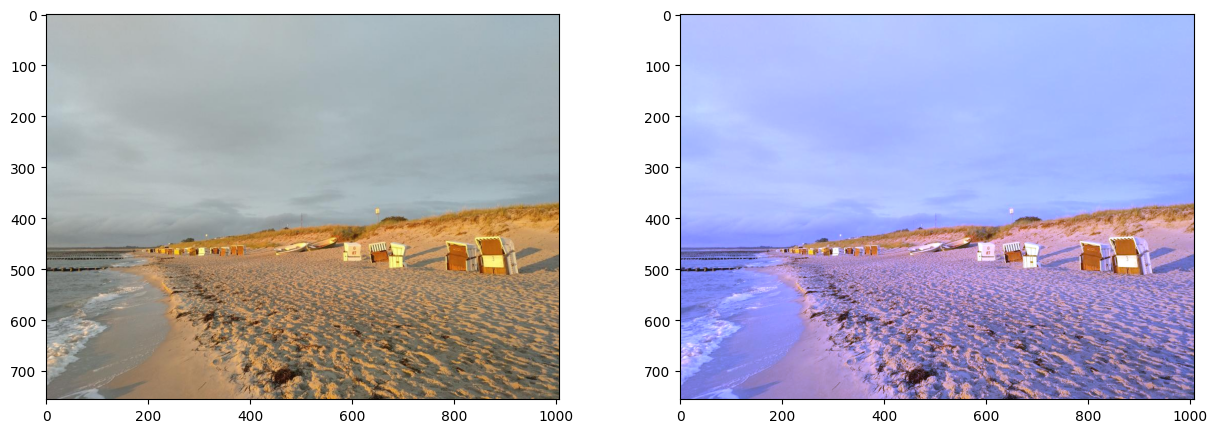

In [98]:
img = cv2.imread("data/sea.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(white_patch(img))

### Gray world
This algorithm assumes that a scene, on average, is gray.

In [53]:
def gray_world(img):
    # Compute the mean values for all three colour channels (red, green, blue)
    mean_r = np.mean(img[...,0])
    mean_g = np.mean(img[...,1])
    mean_b = np.mean(img[...,2])

    # Compute the coefficients kr, kg, kb
    # Note: there are 3 coefficients to compute but we only have 2 equations.
    # Therefore, you have to make an assumption, fix the value of one of the
    # coefficients and compute the remining two
    # Hint: You can fix the coefficient of the brightest colour channel to 1.
    max_mean = max(mean_r, mean_g, mean_b)
    kr = max_mean / mean_r
    kg = max_mean / mean_g
    kb = max_mean / mean_b

    # Apply color balancing and generate the balanced image
    balanced = np.zeros_like(img, dtype=np.float32)
    balanced[..., :3] = img[..., :3] * np.array([kr, kg, kb])

    balanced = balanced/255
    balanced[balanced > 1] = 1
    
    return balanced

(<Axes: >, <matplotlib.image.AxesImage at 0x2bfcdd6c250>)

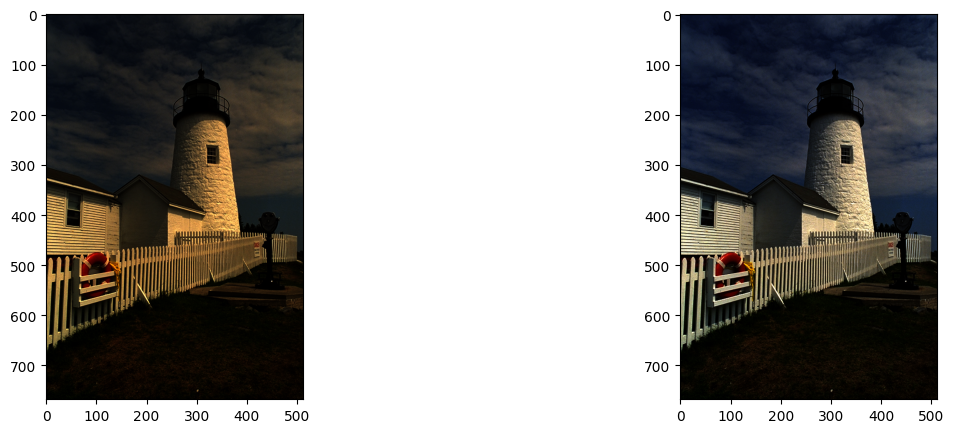

In [54]:
img = cv2.imread("data/dark.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(gray_world(img))

(<Axes: >, <matplotlib.image.AxesImage at 0x2bfd452db10>)

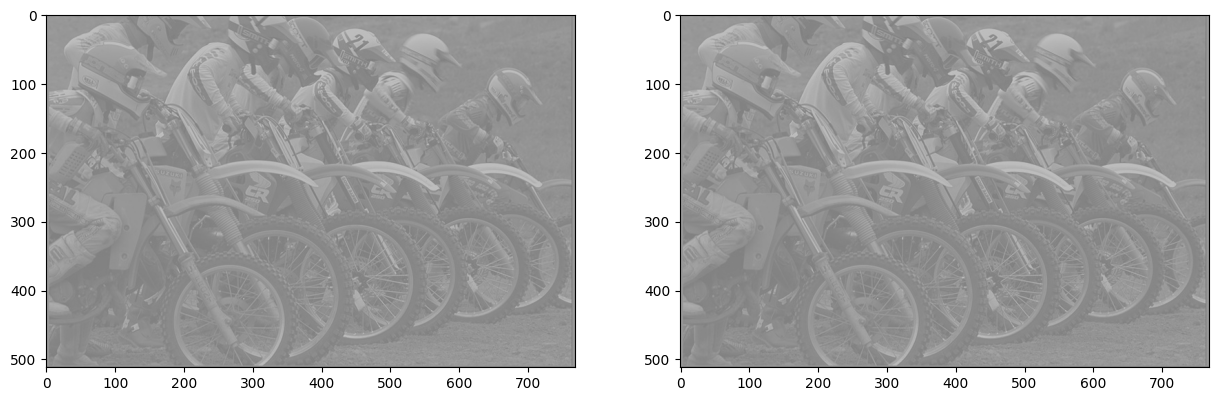

In [55]:
img = cv2.imread("data/kodim05.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(gray_world(img))

(<Axes: >, <matplotlib.image.AxesImage at 0x2bfd60badd0>)

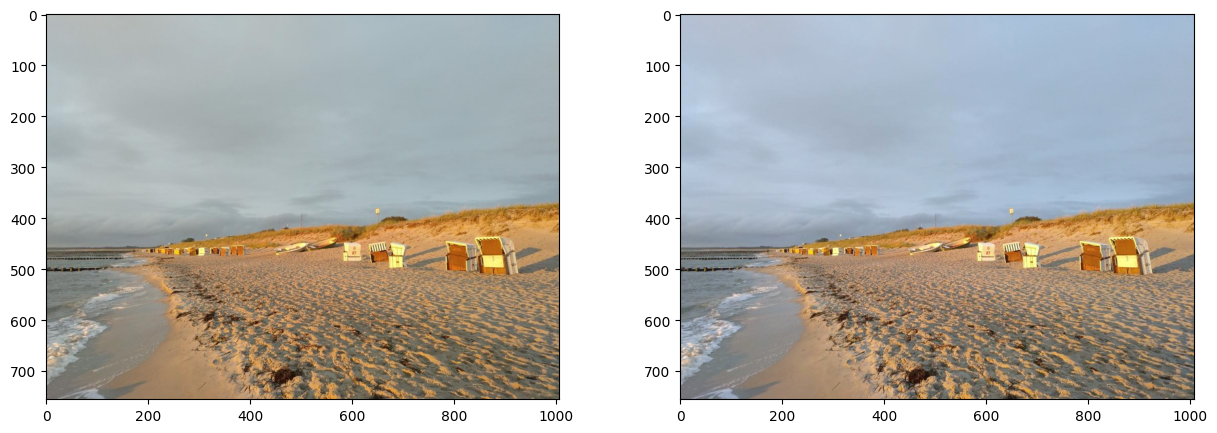

In [56]:
img = cv2.imread("data/sea.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(gray_world(img))

(<Axes: >, <matplotlib.image.AxesImage at 0x2bfc977fd50>)

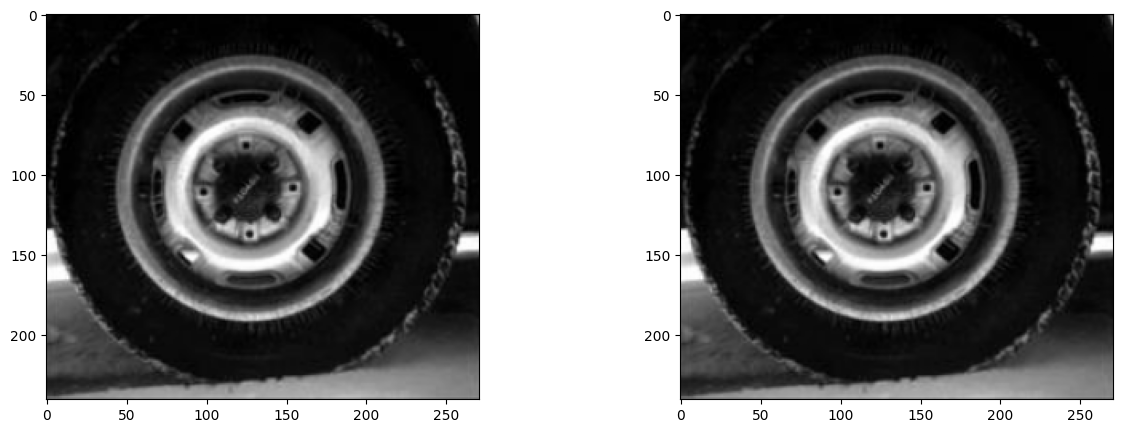

In [57]:
img = cv2.imread("data/tire.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(gray_world(img))

### Scale-by-max
This is a straightforward algorithm that scales each colour channel by its maximum value. Note that it is sensitive to noise and saturations.

In [117]:
def scale_by_max(img):
    # Compute the maximum values for all three colour channels (red, green, blue)
    max_r = img[...,0].max()
    max_g = img[...,1].max()
    max_b = img[...,2].max()
    print("max red - ",max_r)
    print("max green - ",max_g)
    print("max blue - ",max_b)
    
    coefs = 1/np.array([max_r,max_g,max_b])

    # Apply scale-by-max balancing and generate the balanced image
    balanced = np.zeros_like(img, dtype=np.float32)
    balanced[..., :3] = img[..., :3] * np.array(coefs)

    # balanced = balanced/255
    # balanced[balanced > 1] = 1
    
    return balanced

max red -  255
max green -  255
max blue -  255


(<Axes: >, <matplotlib.image.AxesImage at 0x2bfec48bb90>)

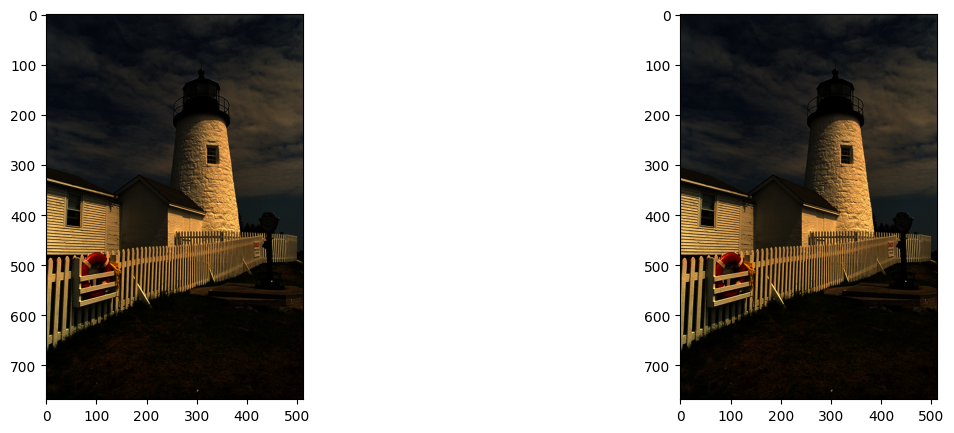

In [118]:
img = cv2.imread("data/dark.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(scale_by_max(img))

max red -  196
max green -  196
max blue -  196


(<Axes: >, <matplotlib.image.AxesImage at 0x2bfd7d06950>)

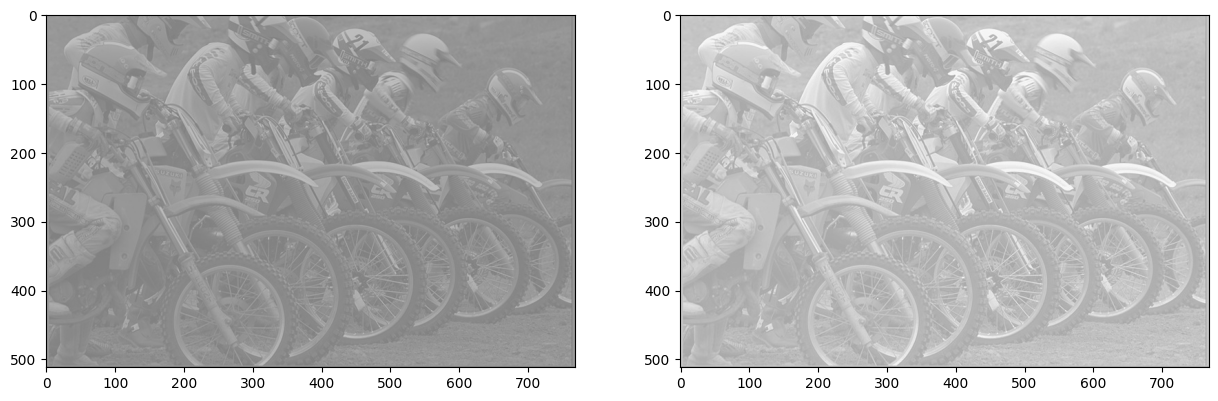

In [86]:
img = cv2.imread("data/kodim05.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(scale_by_max(img))

max red -  255
max green -  255
max blue -  237


(<Axes: >, <matplotlib.image.AxesImage at 0x2bfd7dd6950>)

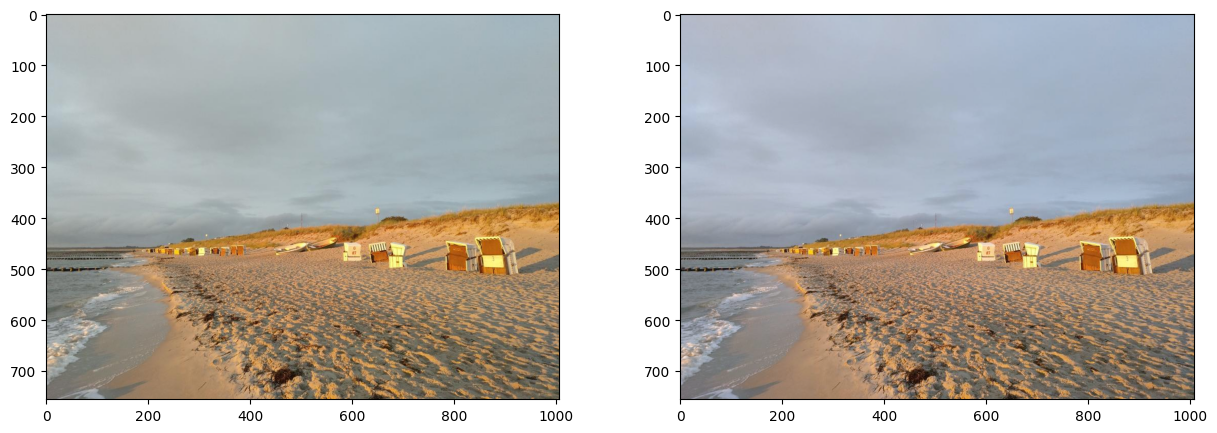

In [87]:
img = cv2.imread("data/sea.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(scale_by_max(img))

max red -  255
max green -  255
max blue -  255


(<Axes: >, <matplotlib.image.AxesImage at 0x2bfddecbb90>)

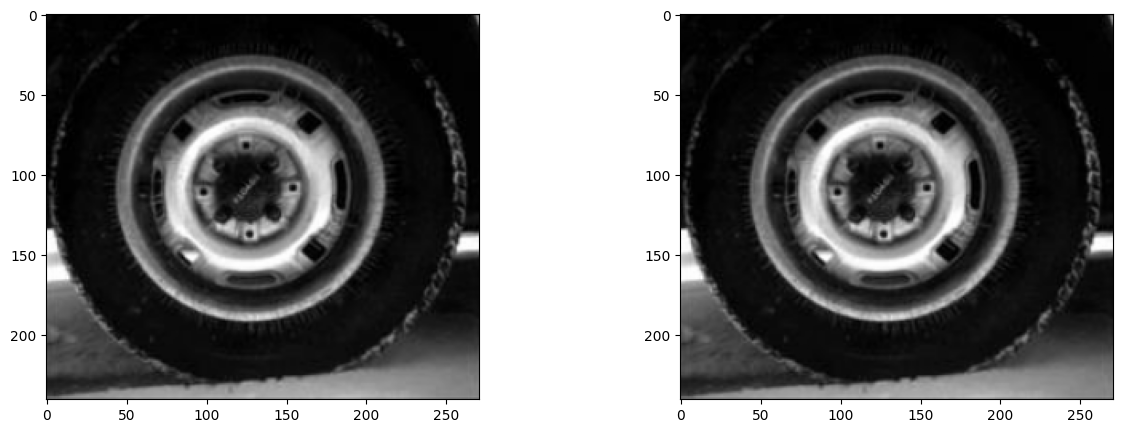

In [88]:
img = cv2.imread("data/tire.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(scale_by_max(img))

# Висновки
1. Результати різних піксельних операцій на різних зображеннях можуть значно відрізнятися. Наприклад, white patch добре працює на темних зображеннях, grey world - на сцені з нормальним освітленням, а scale by max - для вирівнювання найяскравіших пікселів.

2. Це відбувається через різні припущення та обмеження, які покладені в основу кожної операції. Вони розраховані на різні умови освітлення та контрасту зображення.

3. White patch часто кращий для темних/нічних сцен. Grey world добре працює для типових сцен із збалансованим освітленням. Scale by max корисний для зображень із високим динамічним діапазоном яскравості, щоб уникнути пересвічених ділянок. Вибір залежить від характеристик конкретного зображення.